In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
from copy import deepcopy
import pandas as pd

# load experimental data

In [2]:
cw_dir = os.getcwd()

pickled_data_dir = os.path.join(cw_dir, 'pickled_data')

In [3]:
results = {}

for file in os.listdir(pickled_data_dir):
    if file.endswith('.pickle'):
        print(file)
        file_path = os.path.join(pickled_data_dir, file)
        with open(file_path, 'rb') as infile:
            data = pickle.load(infile)
        results[data['molecule']] = data

Be1_STO-3G_singlet.pickle
H1-F1_3-21G_singlet.pickle
H2_6-31G_singlet.pickle
H2_3-21G_singlet.pickle
H3-N1_STO-3G_singlet.pickle
H1-Li1_3-21G_singlet.pickle
H1-Na1_STO-3G_singlet.pickle
C1-O1_STO-3G_singlet.pickle
H2-O1_STO-3G_singlet.pickle
Mg1_STO-3G_singlet.pickle
H3_3-21G_singlet_1+.pickle
H4-N1_STO-3G_singlet_1+.pickle
H1-O1_STO-3G_singlet.pickle
H1-He1_3-21G_singlet_1+.pickle
H4-C1_STO-3G_singlet.pickle
H2-Mg1_STO-3G_singlet.pickle
H1-Li1-O1_STO-3G_singlet.pickle
F2_STO-3G_singlet.pickle
H1-Li1_STO-3G_singlet.pickle
O2_STO-3G_singlet.pickle
H1-F1_STO-3G_singlet.pickle
H2-S1_STO-3G_singlet.pickle
H2-Be1_STO-3G_singlet.pickle
N2_STO-3G_singlet.pickle
H3_STO-3G_singlet_1+.pickle
H1-Cl1_STO-3G_singlet.pickle


In [4]:
# convert keys to readable format
covert_name = {
'H2-Be1_STO-3G_singlet'   :'$BeH_{2}$',
'Mg1_STO-3G_singlet'      :'$Mg$',
'H3_3-21G_singlet_1+'     :'$H_{3}^{+}$ 3-21G',
'O2_STO-3G_singlet'       :'$O_{2}$',     
'H1-O1_STO-3G_singlet'    :'$OH$',
'H4-C1_STO-3G_singlet'    :'$CH_{4}$',
'Be1_STO-3G_singlet'      :'$Be$',
'H3-N1_STO-3G_singlet'    :'$NH_{3}$',
'H2-S1_STO-3G_singlet'    :'$H_{2}S$',
'H2_3-21G_singlet'        :'$H_{2}$ 3-21G',
'H1-F1_3-21G_singlet'     :'$HF$ 3-21G',
'F2_STO-3G_singlet'       :'$F_{2}$',
'H1-Cl1_STO-3G_singlet'   :'$HCl$',
'H1-He1_3-21G_singlet_1+' :'$HeH^{+}$',
'H2-Mg1_STO-3G_singlet'   :'$MgH_{2}$',
'C1-O1_STO-3G_singlet'    :'$CO$',
'H1-Li1_STO-3G_singlet'   :'$LiH$ STO-3G',
'N2_STO-3G_singlet'       :'$N_{2}$',
'H1-Na1_STO-3G_singlet'   :'$NaH$',
'H2-O1_STO-3G_singlet'    :'$H_{2}O$',
'H3_STO-3G_singlet_1+'    :'$H_{3}^{+}$ STO-3G',
'H1-Li1-O1_STO-3G_singlet':'$LiOH$ STO-3G',
'H1-Li1_3-21G_singlet'    :'$LiH$ 3-21G',
'H2_6-31G_singlet'        :'$H_{2}$ 6-31G',
'H4-N1_STO-3G_singlet_1+' :'$NH_{4}^{+}$',
'H1-F1_STO-3G_singlet'    :'$HF$ STO-3G'
}

# How to access result data

1. `cs_vqe` CS-VQE model used and all Hamiltonian data
    - `R_seq_rot` dictionary of sequence of rotations operator $R_{S}$ used in CS-VQE
    - `R_LCU`  dictionary of LCU operator $R_{LCU}$ used in CS-VQE
    - `cs_vqe_LCU` dictionary of contextual subspace Hamiltonians and associated ground state energies
    - `cs_vqe_seqrot` dictionary of contextual subspace Hamiltonians and associated ground state energies
    - `experimental_info` gives all details required for cs-vqe as per [link](https://github.com/wmkirby1/ContextualSubspaceVQE/blob/main/CS_VQE_how_to_use.ipynb).
        - `noncon_H`
        - `full_tapered_H`
        - `gstate_noncon`
        - `gstate_noncon_Energy`
        - `fn_form_CSVQE`
        - `n_qubits`
        - `mol_key`
        - `old_energy_diff`
2. `measurement_reduction` gives the results for unitary partitioning measurement reduction applied ontop of CS-VQE
    - `seq_rot` dictionary of contextual subspace Hamiltonians partitioned into anticommuting sets and associated ground state energies to perform unitary partitioning measurement reduction as a sequence of rotations
    - `LCU` dictionary of contextual subspace Hamiltonians partitioned into anticommuting sets and associated ground state energies to perform unitary partitioning measurement reduction as a LCU
3. `molecule` gives molecule name
4. `H_full` dictionary of full Hamiltonian (no tapering)
5. `H_tap` dictionary of tapered Hamiltonian

In [5]:
# list of molecules as keys
list(results.keys())

['Be1_STO-3G_singlet',
 'H1-F1_3-21G_singlet',
 'H2_6-31G_singlet',
 'H2_3-21G_singlet',
 'H3-N1_STO-3G_singlet',
 'H1-Li1_3-21G_singlet',
 'H1-Na1_STO-3G_singlet',
 'C1-O1_STO-3G_singlet',
 'H2-O1_STO-3G_singlet',
 'Mg1_STO-3G_singlet',
 'H3_3-21G_singlet_1+',
 'H4-N1_STO-3G_singlet_1+',
 'H1-O1_STO-3G_singlet',
 'H1-He1_3-21G_singlet_1+',
 'H4-C1_STO-3G_singlet',
 'H2-Mg1_STO-3G_singlet',
 'H1-Li1-O1_STO-3G_singlet',
 'F2_STO-3G_singlet',
 'H1-Li1_STO-3G_singlet',
 'O2_STO-3G_singlet',
 'H1-F1_STO-3G_singlet',
 'H2-S1_STO-3G_singlet',
 'H2-Be1_STO-3G_singlet',
 'N2_STO-3G_singlet',
 'H3_STO-3G_singlet_1+',
 'H1-Cl1_STO-3G_singlet']

In [6]:
# can change molecule name from list above
mol_name = 'H2_3-21G_singlet'

In [7]:
# top keys
list(results[mol_name].keys())

['cs_vqe', 'measurement_reduction', 'molecule', 'H_full', 'H_tap']

In [8]:
# cs-vqe keys
list(results[mol_name]['cs_vqe'].keys())

['experimental_info', 'R_seq_rot', 'R_LCU', 'cs_vqe_LCU', 'cs_vqe_seqrot']

In [9]:
# measurement reduction keys
list(results[mol_name]['measurement_reduction'].keys())

['seq_rot', 'LCU']

# code to generate figures in publication

In [10]:
def plot_n_terms_and_error(molecule_dict_results, 
                           dpi=200,
                          include_legend=False,
                          save_file = False):
    
    true_gs_energy = molecule_dict_results['cs_vqe']['experimental_info']['true_gs']

    cs_vqe_seqrot_terms = []
    cs_vqe_seqrot_energies =[]

    cs_vqe_LCU_terms = []
    cs_vqe_LCU_energies =[]

    UP_SeqRot_ontop_CS_VQE_SeqRot_terms =[]
    UP_SeqRot_ontop_CS_VQE_SeqRot_energies=[]

    UP_LCU_ontop_CS_VQE_LCU_terms =[]
    UP_LCU_ontop_CS_VQE_LCU_energies=[]
    for ind_key in molecule_dict_results['cs_vqe']['cs_vqe_seqrot'].keys():

        ##### CS-VQE only results
        # seqrot
        cs_vqe_seqrot_terms.append(len(molecule_dict_results['cs_vqe']['cs_vqe_seqrot'][ind_key]['H']))
        cs_vqe_seqrot_energies.append(molecule_dict_results['cs_vqe']['cs_vqe_seqrot'][ind_key]['E'])

        #LCU
        cs_vqe_LCU_terms.append(len(molecule_dict_results['cs_vqe']['cs_vqe_LCU'][ind_key]['H']))
        cs_vqe_LCU_energies.append(molecule_dict_results['cs_vqe']['cs_vqe_LCU'][ind_key]['E'])

        #### Measurement reduction results
        # seq rot
        UP_SeqRot_ontop_CS_VQE_SeqRot_terms.append(len(molecule_dict_results['measurement_reduction']['seq_rot'][ind_key]['AC_sets']))
        UP_SeqRot_ontop_CS_VQE_SeqRot_energies.append(molecule_dict_results['measurement_reduction']['seq_rot'][ind_key]['energy'])

        # LCU
        UP_LCU_ontop_CS_VQE_LCU_terms.append(len(molecule_dict_results['measurement_reduction']['LCU'][ind_key]['AC_sets']))
        UP_LCU_ontop_CS_VQE_LCU_energies.append(molecule_dict_results['measurement_reduction']['LCU'][ind_key]['energy'])

    n_qubits = np.array(list(molecule_dict_results['cs_vqe']['cs_vqe_seqrot'].keys()))

    # error cs vqe only
    cs_vqe_LCU_errors = np.abs(np.array(cs_vqe_LCU_energies)- true_gs_energy)
    cs_vqe_seq_errors = np.abs(np.array(cs_vqe_seqrot_energies)- true_gs_energy)

    # error cs vqe with m_reduction
    UP_LCU_ontop_CS_VQE_LCU_errors = np.abs(np.array(UP_LCU_ontop_CS_VQE_LCU_energies)- true_gs_energy)
    UP_SeqRot_ontop_CS_VQE_SeqRot_errors = np.abs(np.array(UP_SeqRot_ontop_CS_VQE_SeqRot_energies)- true_gs_energy)

    width = 0.2  # the width of the bars
    offset = 0.1 # offset on x axis

    fig, ax = plt.subplots(dpi=dpi)
    rects1 = ax.bar(n_qubits - (offset+width), cs_vqe_seqrot_terms, width, label='$|H_{CSVQE}^{SeqRot}|$',color="g")
    rects2 = ax.bar(n_qubits - offset, cs_vqe_LCU_terms, width, label='$|H_{CSVQE}^{LCU}|$',color="darkblue")
    rects3 = ax.bar(n_qubits + offset, UP_SeqRot_ontop_CS_VQE_SeqRot_terms, width, label='$|H_{CSVQE}^{SeqRot}|$ + $UP_{SeqRot}$',color="crimson")
    rects4 = ax.bar(n_qubits + (offset+width), UP_LCU_ontop_CS_VQE_LCU_terms, width, label='$|H_{CSVQE}^{LCU}|$ + $UP_{LCU}$',color="darkorchid")

    ax.set_ylabel('Number of terms')
    ax.set_xlabel('Number of qubits')


    tapered_N_terms = len(molecule_dict_results['H_tap'])
    tapered_N_qubits = len(list(molecule_dict_results['H_tap'].keys())[0])
    rects5 = ax.bar(tapered_N_qubits + (offset+2*width), tapered_N_terms, width, label='$|H_{full}^{tapered}|$',color="darkorange")


    pre_tapered_N_terms = len(molecule_dict_results['H_full'])
    pre_tapered_N_qubits = len(list(molecule_dict_results['H_full'].keys())[0])
    rects6 = ax.bar(pre_tapered_N_qubits, pre_tapered_N_terms, width, label='$|H_{full}|$',color="darkgrey")

    ####  second y axis!    
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(n_qubits - (offset+width),cs_vqe_seq_errors,color="lightgreen",marker="d", label='$|H_{CSVQE}^{SeqRot}|$ error')
    ax2.plot(n_qubits - offset,cs_vqe_LCU_errors,color="aqua",marker="x", linestyle='', label='$|H_{CSVQE}^{LCU}|$ error')
    ax2.plot(n_qubits + offset,UP_SeqRot_ontop_CS_VQE_SeqRot_errors,color="lightcoral",marker="+", linestyle='', markersize=8, label='$|H_{CSVQE}^{SeqRot}|$ + $UP_{SeqRot}$ error')
    ax2.plot(n_qubits + (offset+width),UP_LCU_ontop_CS_VQE_LCU_errors,color="violet",marker="1", linestyle='', label='$|H_{CSVQE}^{LCU}|$ + $UP_{LCU}$ error', markersize=9)
    ax2.set_ylabel("$\Delta E $",color="black",fontsize=14)

    ax2.axhline(y=1.6e-3, color='black', linestyle='-', label='chemical accuracy')

    # change left and right y axis (as want error on LHS as more important!)
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    ax2.yaxis.tick_left()
    ax2.yaxis.set_label_position("left")

    ax.set_title(covert_name[molecule_dict_results['molecule']])
    ax.set_xticks(np.array([i for i in range(pre_tapered_N_qubits+1)]) )
    ax.set_xticklabels(np.array([i for i in range(pre_tapered_N_qubits+1)]) )
    fig.tight_layout()
    
    if include_legend:
        ax.legend(loc='upper center', bbox_to_anchor=(0.1, -0.15),
              fancybox=True, shadow=True)#), ncol=5)
        ax2.legend(loc='upper center', bbox_to_anchor=(0.8, -0.15),
              fancybox=True, shadow=True)#), ncol=5)
    
    if save_file:
        cw_dir  = os.getcwd()
        figures_dir = os.path.join(cw_dir, 'figures')
        if not os.path.isdir(figures_dir):
            # make figure dir
            os.mkdir(figures_dir)
        
        mol_name= molecule_dict_results['molecule']
        file_name= mol_name +'.png'
        file_output_path = os.path.join(figures_dir, file_name)
        fig.savefig(file_output_path,
                format='png',
                dpi=dpi, bbox_inches='tight')
        plt.close()
    else:
        plt.show()

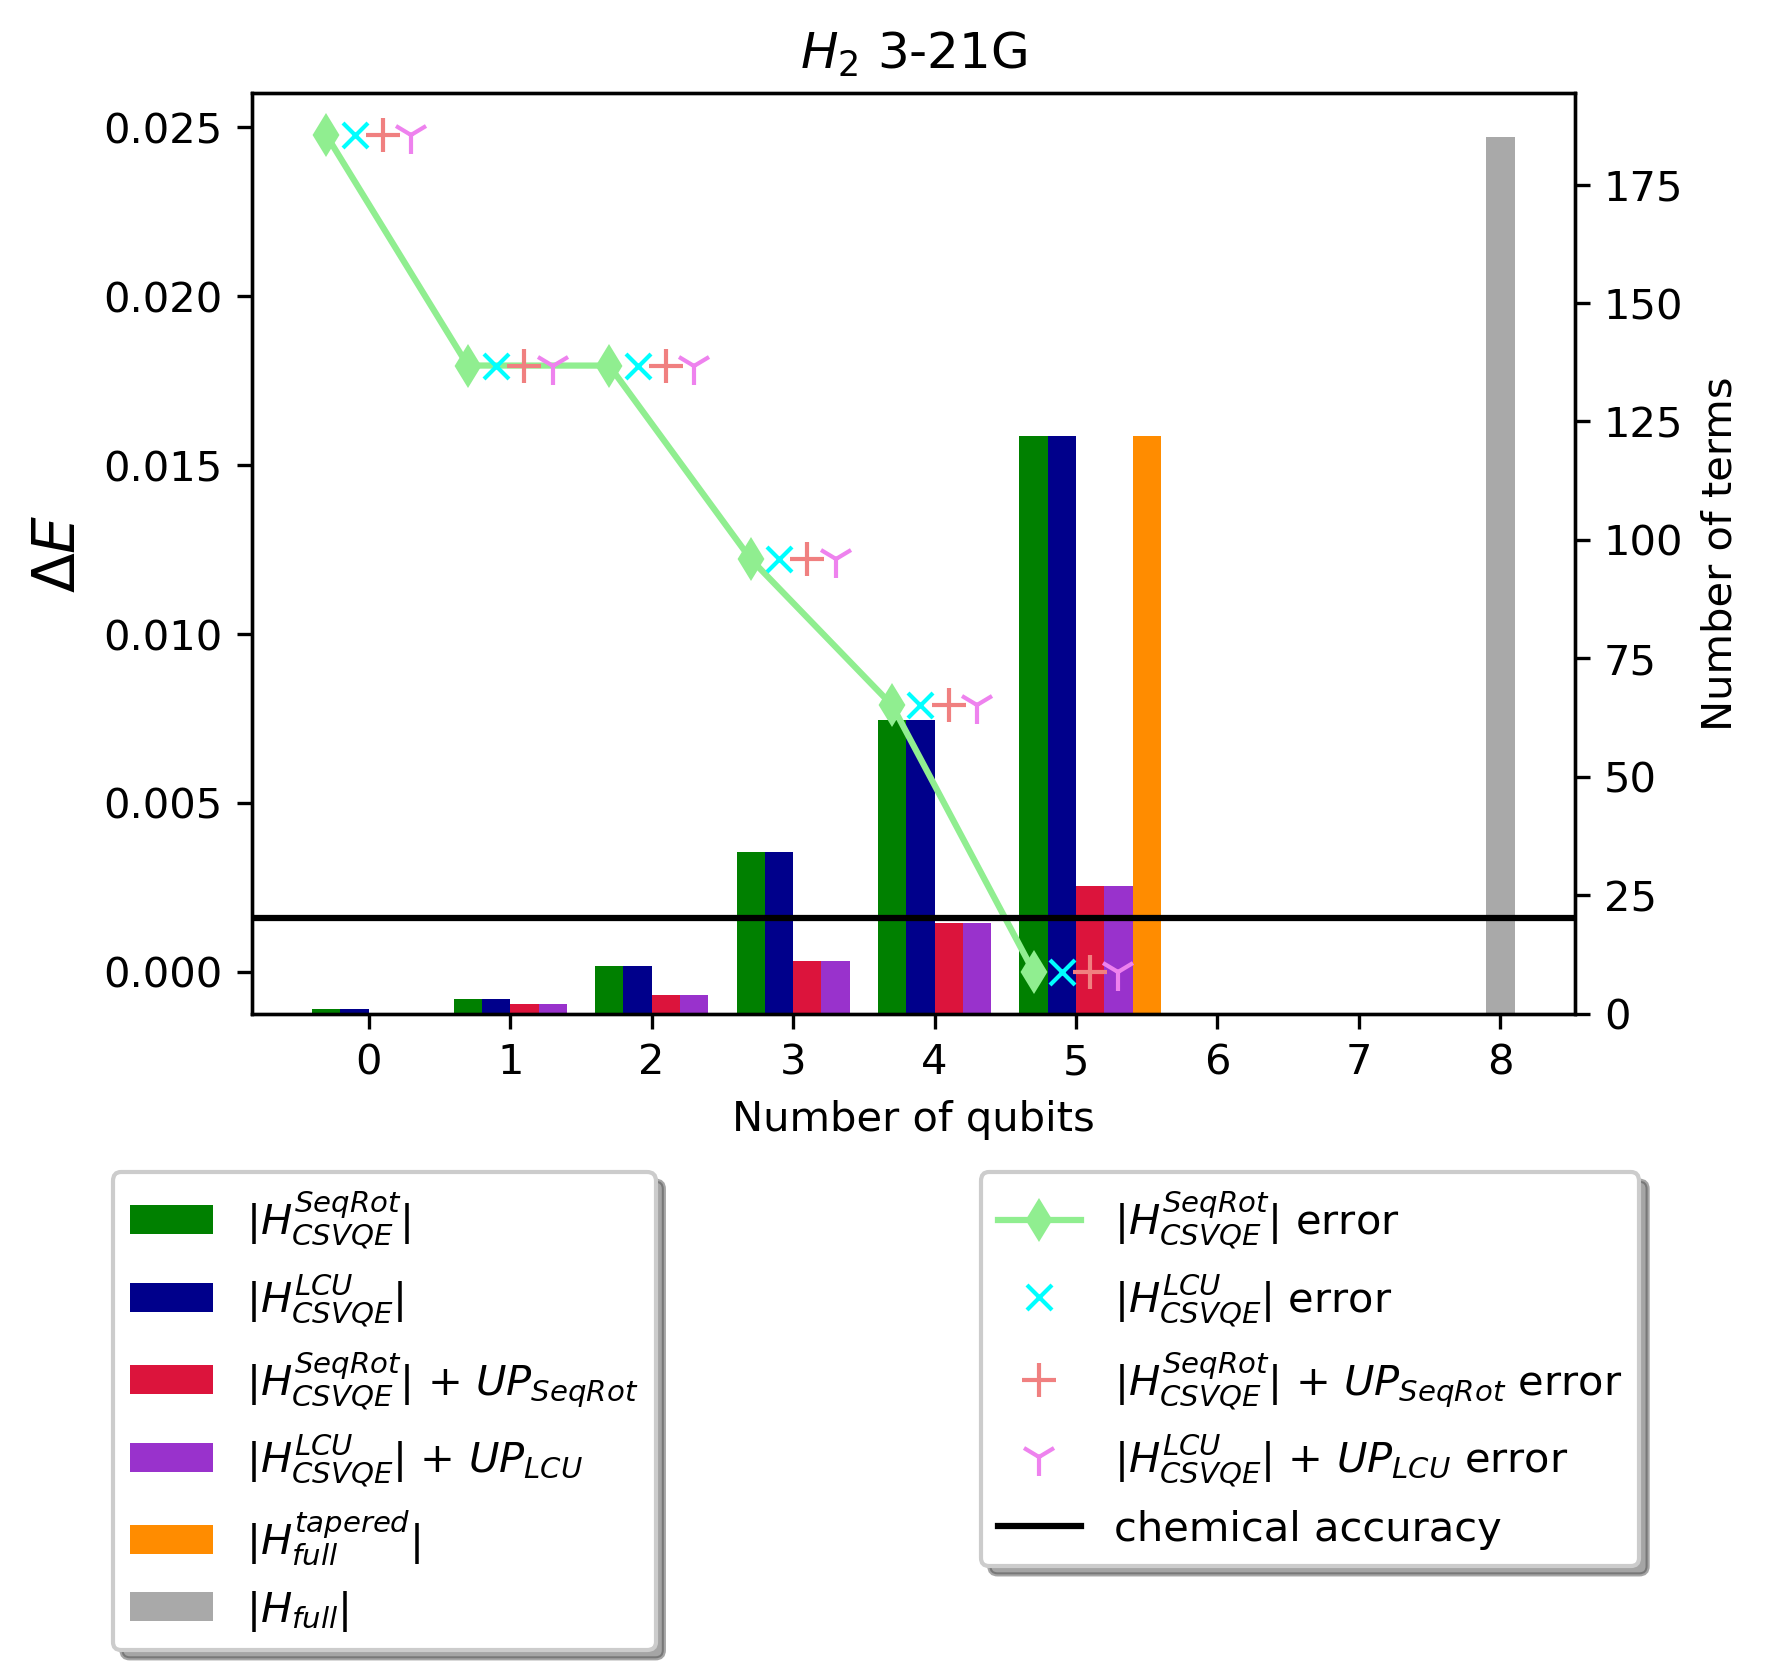

In [11]:
molecule = 'H2_3-21G_singlet' #<-- change this


plot_n_terms_and_error(results[molecule], 
                       dpi=300,
                       include_legend=True,
                       save_file = False)

In [12]:
# plot all figures
for molecule in results.keys():
    plot_n_terms_and_error(results[molecule], 
                           dpi=300,
                           include_legend=False,
                          save_file = True)

In [13]:
order = ['H2-Be1_STO-3G_singlet',
         'Mg1_STO-3G_singlet',
         'H3_3-21G_singlet_1+',
         'O2_STO-3G_singlet',
         'H1-O1_STO-3G_singlet',
         'H4-C1_STO-3G_singlet',
         'Be1_STO-3G_singlet',
         'H3-N1_STO-3G_singlet',
         'H2-S1_STO-3G_singlet',
         'H2_3-21G_singlet',
         'H1-F1_3-21G_singlet',
         'F2_STO-3G_singlet',
         'H1-Cl1_STO-3G_singlet',
         'H1-He1_3-21G_singlet_1+',
         'H2-Mg1_STO-3G_singlet',
         'C1-O1_STO-3G_singlet',
         'H1-Li1_STO-3G_singlet',
         'N2_STO-3G_singlet',
         'H1-Na1_STO-3G_singlet',
         'H2-O1_STO-3G_singlet',
         'H3_STO-3G_singlet_1+',
         'H1-Li1-O1_STO-3G_singlet',
         'H1-Li1_3-21G_singlet',
         'H2_6-31G_singlet',
         'H4-N1_STO-3G_singlet_1+',
         'H1-F1_STO-3G_singlet']

In [14]:
data = {'molecule': [], 
        '$H_{CSVQE+LCU}$':[],
        '$H_{CSVQE+SeqRot}$':[],
        '$H_{CSVQE+LCU} + UP^{(LCU)}$':[],
        '$H_{CSVQE+SeqRot} + UP^{(SeqRot)}$':[],
        '$H_{tapered}$':[],
        '$H_{full}$':[],
       }



for mol_name in order: #results.keys():
    
    True_gs_energy = results[mol_name]['cs_vqe']['experimental_info']['true_gs']
    
    # cs_vqe_seqrot (no M reduction)
    for ind in sorted(results[mol_name]['cs_vqe']['cs_vqe_seqrot'].keys()): 
        UP_SeqRot_E = results[mol_name]['cs_vqe']['cs_vqe_seqrot'][ind]['E']
        if np.abs(True_gs_energy-UP_SeqRot_E)<=1.6e-3:
            seqrot_csvqe_ind = deepcopy(ind)
            break
    
    # cs_vqe_LCU (no M reduction)
    for ind in sorted(results[mol_name]['cs_vqe']['cs_vqe_LCU'].keys()): 
        UP_SeqRot_E = results[mol_name]['cs_vqe']['cs_vqe_LCU'][ind]['E']
        if np.abs(True_gs_energy-UP_SeqRot_E)<=1.6e-3:
            LCU_csvqe_ind = deepcopy(ind)
            break
            
    # cs_vqe_seqrot with seqrot M reduction
    for ind in sorted(results[mol_name]['measurement_reduction']['seq_rot'].keys()): 
        UP_SeqRot_E = results[mol_name]['measurement_reduction']['seq_rot'][ind]['energy']
        if np.abs(True_gs_energy-UP_SeqRot_E)<=1.6e-3:
            seqrot_csvqe_seqrot_red_ind = deepcopy(ind)
            break
    
    # cs_vqe_LCU with LCU M reduction
    for ind in sorted(results[mol_name]['measurement_reduction']['LCU'].keys()): 
        UP_SeqRot_E = results[mol_name]['measurement_reduction']['LCU'][ind]['energy']
        if np.abs(True_gs_energy-UP_SeqRot_E)<=1.6e-3:
            LCU_csvqe_LCU_red_ind = deepcopy(ind)
            break
    
    if not (seqrot_csvqe_ind==LCU_csvqe_ind==seqrot_csvqe_seqrot_red_ind==LCU_csvqe_LCU_red_ind):
        raise ValueError('different result for different methods! Something likely wrong')
    
    
    data['molecule'].append(covert_name[mol_name])
    
    # no tapering
    no_tap = (len(list(results[mol_name]['H_full'].keys())[0]), len(results[mol_name]['H_full']))
    data['$H_{full}$'].append(no_tap)
    
    # tapered
    tap = (len(list(results[mol_name]['H_tap'].keys())[0]), len(results[mol_name]['H_tap']))
    data['$H_{tapered}$'].append(tap)
    
    ### CS-VQE Hamiltonians that reach chemical accuracy
    
    # CS_VQE only
    cs_vqe_seqrot = (len(list(results[mol_name]['cs_vqe']['cs_vqe_seqrot'][seqrot_csvqe_ind]['H'].keys())[0]),
                     len(results[mol_name]['cs_vqe']['cs_vqe_seqrot'][seqrot_csvqe_ind]['H']))
    data['$H_{CSVQE+SeqRot}$'].append(cs_vqe_seqrot)
    
    cs_vqe_LCU = (len(list(results[mol_name]['cs_vqe']['cs_vqe_LCU'][LCU_csvqe_ind]['H'].keys())[0]),
                 len(results[mol_name]['cs_vqe']['cs_vqe_LCU'][LCU_csvqe_ind]['H']))
    data['$H_{CSVQE+LCU}$'].append(cs_vqe_LCU)
    
    # CS_VQE + UP
    cs_vqe_UP_seqrot = (len(list(results[mol_name]['measurement_reduction']['seq_rot'][seqrot_csvqe_seqrot_red_ind]['AC_sets'][0].keys())[0]),
                        len(results[mol_name]['measurement_reduction']['seq_rot'][seqrot_csvqe_seqrot_red_ind]['AC_sets']))
    data['$H_{CSVQE+SeqRot} + UP^{(SeqRot)}$'].append(cs_vqe_UP_seqrot)
    
    cs_vqe_UP_LCU = (len(list(results[mol_name]['measurement_reduction']['LCU'][LCU_csvqe_LCU_red_ind]['AC_sets'][0].keys())[0]),
                        len(results[mol_name]['measurement_reduction']['LCU'][LCU_csvqe_LCU_red_ind]['AC_sets']))
    data['$H_{CSVQE+LCU} + UP^{(LCU)}$'].append(cs_vqe_UP_LCU)


In [15]:
df = pd.DataFrame(data=data)
df

molecule $H_{CSVQE+LCU}$ $H_{CSVQE+SeqRot}$  \
0            $BeH_{2}$        (7, 268)           (7, 268)   
1                 $Mg$       (10, 675)          (10, 675)   
2    $H_{3}^{+}$ 3-21G        (9, 914)           (9, 914)   
3              $O_{2}$       (11, 815)          (11, 815)   
4                 $OH$        (6, 231)           (6, 231)   
5             $CH_{4}$      (12, 1359)         (12, 1359)   
6                 $Be$         (3, 20)            (3, 20)   
7             $NH_{3}$      (11, 1733)         (11, 1733)   
8             $H_{2}S$        (7, 435)           (7, 435)   
9        $H_{2}$ 3-21G        (5, 122)           (5, 122)   
10          $HF$ 3-21G      (17, 5530)         (17, 5530)   
11             $F_{2}$        (9, 527)           (9, 527)   
12               $HCl$        (4, 100)           (4, 100)   
13           $HeH^{+}$        (5, 155)           (5, 155)   
14           $MgH_{2}$      (15, 2285)         (15, 2285)   
15                $CO$      (12, 1599)         (12, 1599)   
16        $LiH$ STO-3G        (4, 100)           (4, 100)   
17             $N_{2}$       (11, 815)          (11, 815)   
18               $NaH$      (14, 2722)         (14, 2722)   
19            $H_{2}O$        (7, 435)           (7, 435)   
20  $H_{3}^{+}$ STO-3G          (1, 3)             (1, 3)   
21       $LiOH$ STO-3G      (13, 2104)         (13, 2104)   
22         $LiH$ 3-21G      (13, 2732)         (13, 2732)   
23       $H_{2}$ 6-31G        (5, 122)           (5, 122)   
24        $NH_{4}^{+}$      (12, 1359)         (12, 1359)   
25         $HF$ STO-3G        (4, 100)           (4, 100)   

   $H_{CSVQE+LCU} + UP^{(LCU)}$ $H_{CSVQE+SeqRot} + UP^{(SeqRot)}$  \
0                       (7, 61)                            (7, 61)   
1                     (10, 114)                          (10, 114)   
2                      (9, 115)                           (9, 115)   
3                     (11, 157)                          (11, 157)   
4                       (6, 62)                            (6, 62)   
5                     (12, 203)                          (12, 203)   
6                        (3, 9)                             (3, 9)   
7                     (11, 200)                          (11, 200)   
8                       (7, 92)                            (7, 92)   
9                       (5, 27)                            (5, 27)   
10                    (17, 648)                          (17, 648)   
11                      (9, 99)                            (9, 99)   
12                      (4, 35)                            (4, 35)   
13                      (5, 35)                            (5, 35)   
14                    (15, 289)                          (15, 289)   
15                    (12, 241)                          (12, 241)   
16                      (4, 35)                            (4, 35)   
17                    (11, 153)                          (11, 153)   
18                    (14, 375)                          (14, 375)   
19                      (7, 73)                            (7, 73)   
20                       (1, 2)                             (1, 2)   
21                    (13, 296)                          (13, 296)   
22                    (13, 375)                          (13, 383)   
23                      (5, 27)                            (5, 27)   
24                    (12, 176)                          (12, 176)   
25                      (4, 35)                            (4, 35)   

   $H_{tapered}$   $H_{full}$  
0       (9, 596)    (14, 666)  
1     (13, 1465)   (18, 3388)  
2       (9, 914)   (12, 1501)  
3     (15, 2229)   (20, 2255)  
4       (8, 558)    (12, 631)  
5     (14, 2194)   (18, 5288)  
6       (5, 102)    (10, 156)  
7     (13, 3048)   (16, 4293)  
8     (18, 6237)   (22, 6246)  
9       (5, 122)     (8, 185)  
10    (18, 6852)  (22, 13958)  
11    (15, 2229)   (20, 2367)  
12    (16, 4409)   (20, 8159)  
13      (6, 319)     (8, 36

# plotting summary data

In [16]:
data_points = len(data['molecule'])


x_data = []
Y_data_nqubits = np.zeros((data_points, 4))
Y_data_Nterms = np.zeros((data_points, 4))
for i in range(data_points):
    mol = data['molecule'][i]
    cs_vqe_NQ, cs_vqe_Nterms       = data['$H_{CSVQE+SeqRot}$'][i]
    cs_vqe_up_NQ, cs_vqe_up_Nterms = data['$H_{CSVQE+SeqRot} + UP^{(SeqRot)}$'][i]
    tapered_NQ, tapered_Nterms     = data['$H_{tapered}$'][i]
    full_NQ, full_Nterms           = data['$H_{full}$'][i]
    
    if cs_vqe_NQ!= cs_vqe_up_NQ:
        raise ValuError('error')
    
    Y_data_nqubits[i] = [cs_vqe_NQ, cs_vqe_up_NQ, tapered_NQ, full_NQ]
    Y_data_Nterms[i] = [cs_vqe_Nterms, cs_vqe_up_Nterms, tapered_Nterms, full_Nterms]
    
    x_data.append(mol)


x_data = np.array(x_data)
    
## order by H size!
order_by_H_size = np.argsort(Y_data_Nterms[:,3])
x_data = x_data[order_by_H_size]
Y_data_nqubits = Y_data_nqubits[order_by_H_size]
Y_data_Nterms = Y_data_Nterms[order_by_H_size]

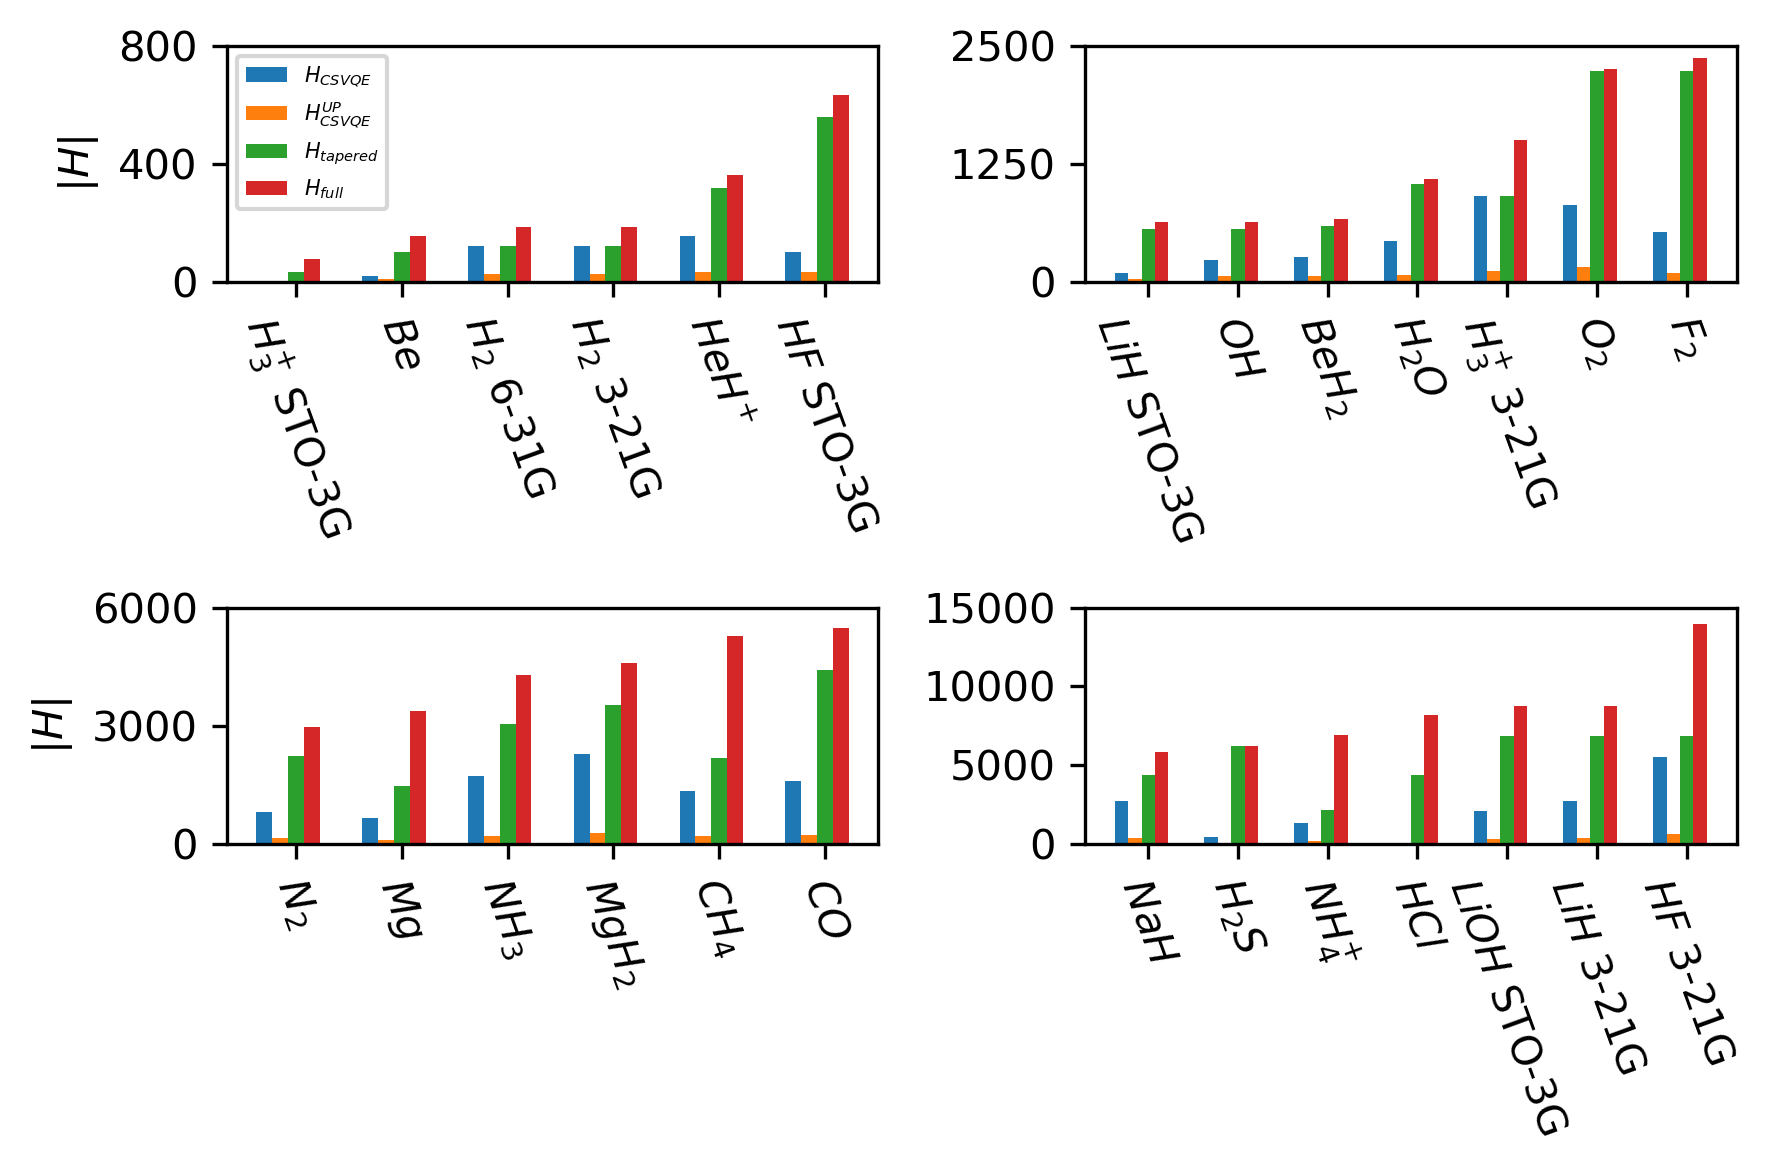

In [17]:
%matplotlib inline
dpi=200

first_no = 6
interval = 13- first_no

ind_2x = np.arange(13- first_no)
# use half of data!
ind1 = np.arange(first_no)  # the x locations for each molecule
ind2 = np.arange(first_no, first_no+interval) 
ind3 = np.arange(first_no+interval,2*first_no+interval)  
ind4 = np.arange(2*first_no+interval,2*first_no+2*interval) 

width = 0.6 # the width of the bars


fig, axis = plt.subplots(2, 2, dpi=300) #, sharey=True)

ax1 = axis[0,0]
ax2 = axis[0,1]
ax3 = axis[1,0]
ax4 = axis[1,1]

rects1 = ax1.bar(ind1 - width/2, Y_data_Nterms[ind1,0], width/4, label='$H_{CSVQE}$')
rects2 = ax1.bar(ind1 - width/4, Y_data_Nterms[ind1,1], width/4, label='$H_{CSVQE}^{UP}$')
rects3 = ax1.bar(ind1,           Y_data_Nterms[ind1,2], width/4, label='$H_{tapered}$')
rects4 = ax1.bar(ind1 + width/4, Y_data_Nterms[ind1,3], width/4, label='$H_{full}$')

rects5 = ax2.bar(ind_2x - width/2, Y_data_Nterms[ind2,0], width/4, label='$H_{CSVQE}$')
rects6 = ax2.bar(ind_2x - width/4, Y_data_Nterms[ind2,1], width/4, label='$H_{CSVQE}^{UP}$')
rects7 = ax2.bar(ind_2x,           Y_data_Nterms[ind2,2], width/4, label='$H_{tapered}$')
rects8 = ax2.bar(ind_2x + width/4, Y_data_Nterms[ind2,3], width/4, label='$H_{full}$')

rects9 = ax3.bar(ind1 - width/2,  Y_data_Nterms[ind3,0], width/4, label='$H_{CSVQE}$')
rects10 = ax3.bar(ind1 - width/4, Y_data_Nterms[ind3,1], width/4, label='$H_{CSVQE}^{UP}$')
rects11 = ax3.bar(ind1,           Y_data_Nterms[ind3,2], width/4, label='$H_{tapered}$')
rects12 = ax3.bar(ind1 + width/4, Y_data_Nterms[ind3,3], width/4, label='$H_{full}$')

rects13 = ax4.bar(ind_2x - width/2, Y_data_Nterms[ind4,0], width/4, label='$H_{CSVQE}$')
rects14 = ax4.bar(ind_2x - width/4, Y_data_Nterms[ind4,1], width/4, label='$H_{CSVQE}^{UP}$')
rects15 = ax4.bar(ind_2x,           Y_data_Nterms[ind4,2], width/4, label='$H_{tapered}$')
rects16 = ax4.bar(ind_2x + width/4, Y_data_Nterms[ind4,3], width/4, label='$H_{full}$')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('$|H|$')
ax1.set_xticks(ind1)
ax1.set_xticklabels(x_data[ind1], rotation=290)
# ax1.legend()
ax1.legend(fontsize=5)
ax1.set_yticks(np.arange(0,1_200, 400))

# ax2.set_ylabel('$|H|$')
ax2.set_xticks(ind_2x)
ax2.set_xticklabels(x_data[ind2], rotation=290)
# ax2.legend()
ax2.set_yticks(np.arange(0,3_000, 1_250))

ax3.set_ylabel('$|H|$')
ax3.set_xticks(ind1)
ax3.set_xticklabels(x_data[ind3], rotation=290)
# ax3.legend()
ax3.set_yticks(np.arange(0, 9_000, 3_000))

# ax4.set_ylabel('$|H|$')
ax4.set_xticks(ind_2x)
ax4.set_xticklabels(x_data[ind4], rotation=290)
# ax4.legend()
ax4.set_yticks(np.arange(0, 20_000, 5_000))

fig.tight_layout()

# plt.xticks(rotation=300)
plt.show()

## save file
cw_dir  = os.getcwd()
figures_dir = os.path.join(cw_dir, 'summary_figures')
if not os.path.isdir(figures_dir):
    # make figure dir
    os.mkdir(figures_dir)

file_name='terms_figure.png'
file_output_path = os.path.join(figures_dir, file_name)
fig.savefig(file_output_path,
        format='png',
        dpi=dpi, bbox_inches='tight')

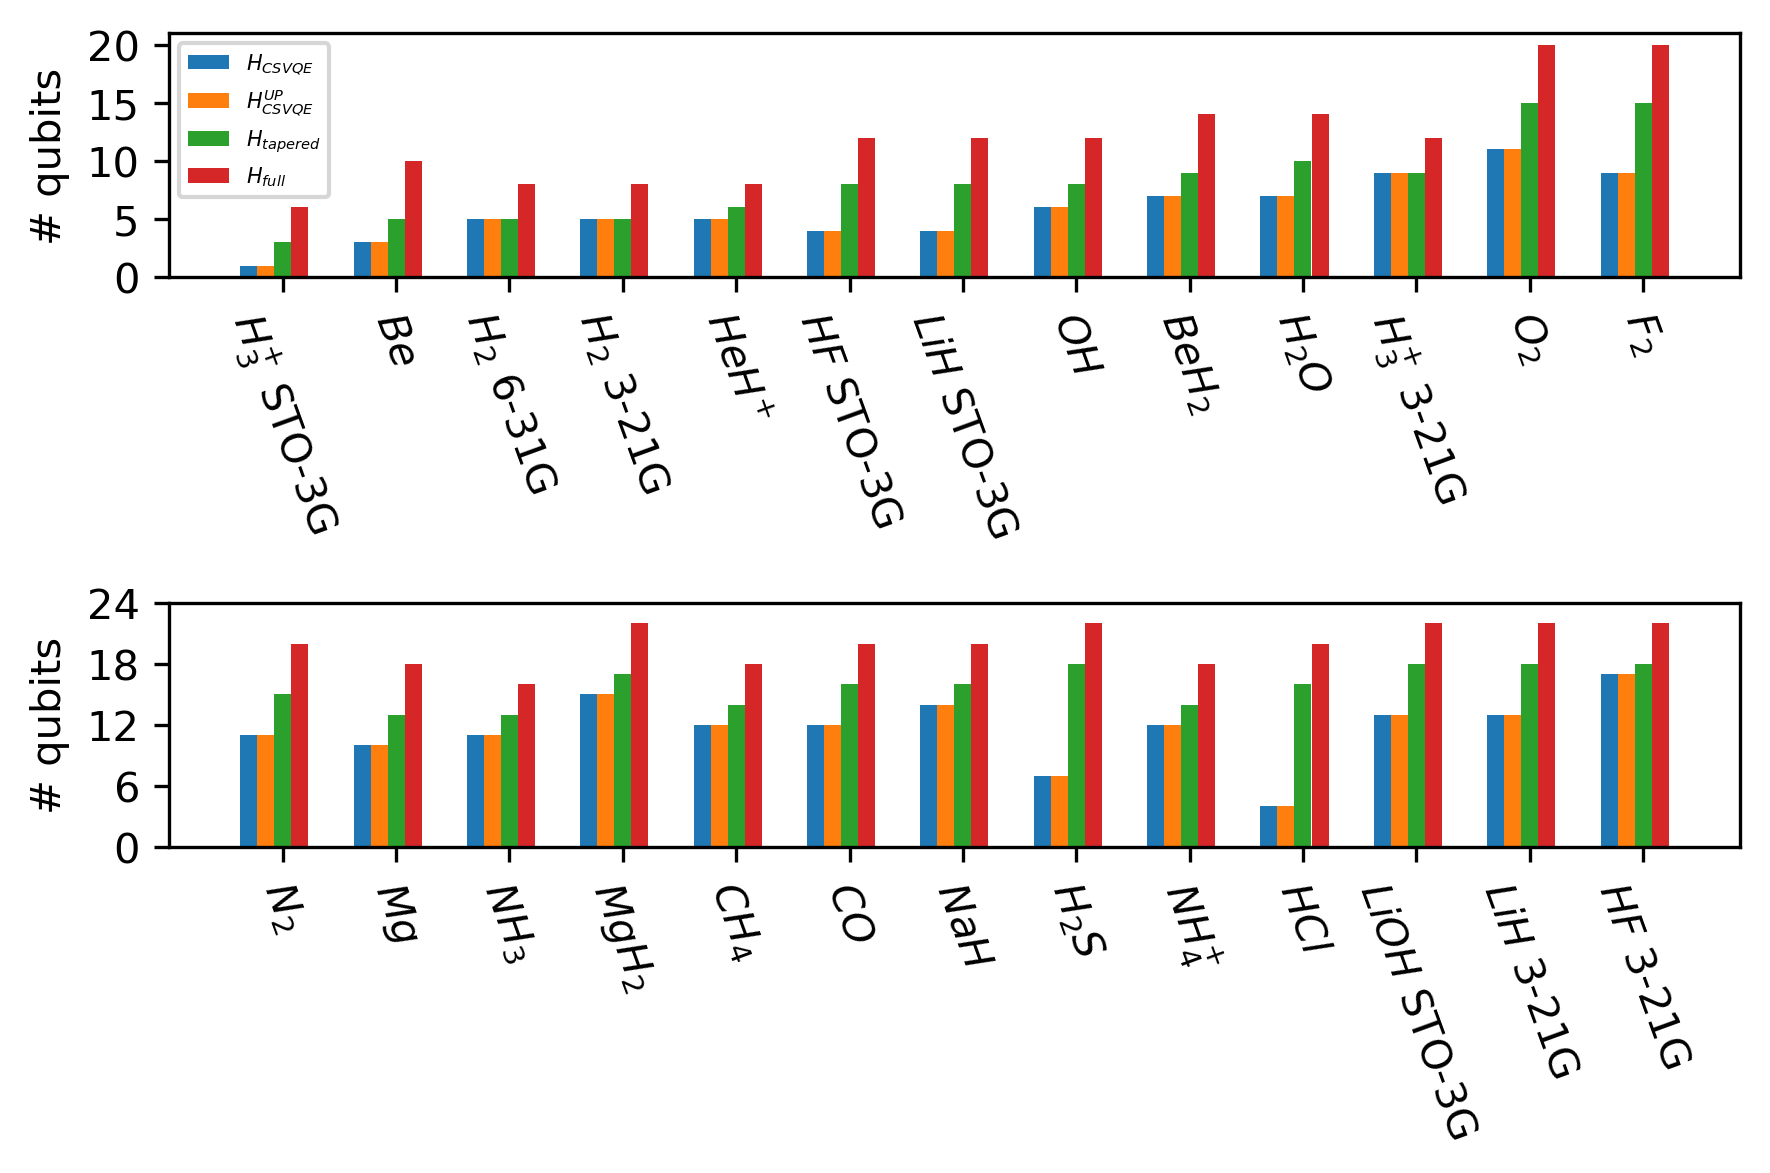

In [18]:
%matplotlib inline
dpi=200

# plot data in two halves
ind1 = np.arange(data_points//2)  # the x locations for each molecule
ind2 = np.arange(data_points//2, data_points)  # the x locations for each molecule
# ind = np.arange(13)  # the x locations for each molecule
width = 0.6 # the width of the bars


fig, (ax1, ax2) = plt.subplots(2, 1, dpi=300) #, sharey=True)
rects1 = ax1.bar(ind1 - width/2, Y_data_nqubits[ind1,0], width/4, label='$H_{CSVQE}$')
rects2 = ax1.bar(ind1 - width/4, Y_data_nqubits[ind1,1], width/4, label='$H_{CSVQE}^{UP}$')
rects3 = ax1.bar(ind1,           Y_data_nqubits[ind1,2], width/4, label='$H_{tapered}$')
rects4 = ax1.bar(ind1 + width/4, Y_data_nqubits[ind1,3], width/4, label='$H_{full}$')

rects5 = ax2.bar(ind1 - width/2, Y_data_nqubits[ind2,0], width/4, label='$H_{CSVQE}$')
rects6 = ax2.bar(ind1 - width/4, Y_data_nqubits[ind2,1], width/4, label='$H_{CSVQE}^{UP}$')
rects7 = ax2.bar(ind1,           Y_data_nqubits[ind2,2], width/4, label='$H_{tapered}$')
rects8 = ax2.bar(ind1 + width/4, Y_data_nqubits[ind2,3], width/4, label='$H_{full}$')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('# qubits')
ax1.set_xticks(ind1)
ax1.set_xticklabels(x_data[ind1], rotation=290)
# ax1.legend()
ax1.legend(fontsize=5)
ax1.set_yticks(np.arange(0,25, 5))


ax2.set_ylabel('# qubits')
ax2.set_xticks(ind1)
# ax2.set_xticklabels(x_data[ind])
ax2.set_xticklabels(x_data[ind2], rotation=290)
# ax2.legend()
ax2.set_yticks(np.arange(0,30, 6))


fig.tight_layout()

# plt.xticks(rotation=300)
plt.show()


## save file
cw_dir  = os.getcwd()
figures_dir = os.path.join(cw_dir, 'summary_figures')
if not os.path.isdir(figures_dir):
    # make figure dir
    os.mkdir(figures_dir)

file_name='qubits_figure.png'
file_output_path = os.path.join(figures_dir, file_name)
fig.savefig(file_output_path,
        format='png',
        dpi=dpi, bbox_inches='tight')

# gate counts

In [19]:
def gate_count_SeqRot(AC_sets_dict, n_qubits):
    
    """
    single qubit gates: O((2Ns + 1)(|HSl | − 1))
    CNOT gates: O(2(Ns − 1)(|HSl | − 1)) 
    """
    
    largest_set = max(AC_sets_dict.values(), key=lambda x: len(x))    
    len_AC_set = len(largest_set)
    

    R_seqrot_single_q_gates = (2*n_qubits+1)*(len_AC_set-1)
    R_seqrot_CNOT_gates = (2*(n_qubits-1))*(len_AC_set-1)
    
    
    return R_seqrot_single_q_gates, R_seqrot_CNOT_gates

In [20]:
data_unitary_partitioning = {'molecule': [], 
        'No. gates for $R_{S}$':[]
       }

for mol_name in order: #results.keys():
    
    
    data_unitary_partitioning['molecule'].append(covert_name[mol_name])
    
    True_gs_energy = results[mol_name]['cs_vqe']['experimental_info']['true_gs']
    # cs_vqe_seqrot with seqrot M reduction
    for ind in sorted(results[mol_name]['measurement_reduction']['seq_rot'].keys()): 
        UP_SeqRot_E = results[mol_name]['measurement_reduction']['seq_rot'][ind]['energy']
        if np.abs(True_gs_energy-UP_SeqRot_E)<=1.6e-3:
            seqrot_csvqe_seqrot_red_ind = deepcopy(ind)
            break
    
    # CS_VQE + SeqRot UP
    AC_sets = results[mol_name]['measurement_reduction']['seq_rot'][seqrot_csvqe_seqrot_red_ind]['AC_sets']
    n_qubits = len(list(results[mol_name]['measurement_reduction']['LCU'][seqrot_csvqe_seqrot_red_ind]['AC_sets'][0].keys())[0])
    
    single_gates, CNOT_gates = gate_count_SeqRot(AC_sets, n_qubits)
    data_string = f'[{single_gates}, {CNOT_gates}]'
    data_unitary_partitioning['No. gates for $R_{S}$'].append(data_string)


In [21]:
df2 = pd.DataFrame(data=data_unitary_partitioning)
df2

molecule No. gates for $R_{S}$
0            $BeH_{2}$              [90, 72]
1                 $Mg$            [189, 162]
2    $H_{3}^{+}$ 3-21G            [209, 176]
3              $O_{2}$            [184, 160]
4                 $OH$             [104, 80]
5             $CH_{4}$            [325, 286]
6                 $Be$               [14, 8]
7             $NH_{3}$            [299, 260]
8             $H_{2}S$             [120, 96]
9        $H_{2}$ 3-21G              [66, 48]
10          $HF$ 3-21G            [735, 672]
11             $F_{2}$            [133, 112]
12               $HCl$              [36, 24]
13           $HeH^{+}$              [88, 64]
14           $MgH_{2}$            [403, 364]
15                $CO$            [325, 286]
16        $LiH$ STO-3G              [36, 24]
17             $N_{2}$            [207, 180]
18               $NaH$            [493, 442]
19            $H_{2}O$             [120, 96]
20  $H_{3}^{+}$ STO-3G                [3, 0]
21       $LiOH$ STO-3G            [378, 336]
22         $LiH$ 3-21G            [459, 408]
23       $H_{2}$ 6-31G              [66, 48]
24        $NH_{4}^{+}$            [325, 286]
25         $HF$ STO-3G              [36, 24]